In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/processed/telco_churn_outliers_handled.csv')
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
numerical_columns = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

for column in numerical_columns:
    print(df[column].describe())

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


Tenure (Months)
- 0 - 6 ---> New (Trial Period Customers)
- 6 - 12 ---> Early 
- 12 - 24 ---> Established
- 24 - 36 ---> Mature 
- 36 - 60 ---> Long Term (Loyal Customers)
- 60+ ---> Veteran (Most Loyal Customers)

In [6]:
def custom_binning_tenure(value):
    if value <= 6:
        return 'New'
    elif value <= 12:
        return 'Early'
    elif value <= 24:
        return 'Established'
    elif value <= 36:
        return 'Mature'
    elif value <= 60:
        return 'Long Term'
    else:
        return 'Veteran'

df['TenureBins'] = df['tenure'].apply(custom_binning_tenure)
del df['tenure']
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureBins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Mature
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long Term
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New


In [7]:
df['TenureBins'].unique()

array(['New', 'Mature', 'Long Term', 'Early', 'Established', 'Veteran'],
      dtype=object)

<Axes: title={'center': 'Tenure Bins Distribution'}, ylabel='count'>

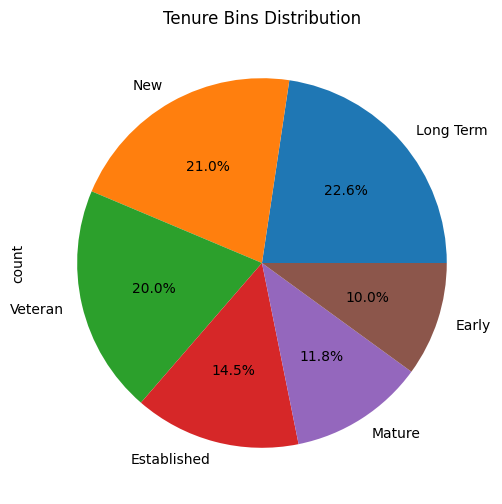

In [9]:
df['TenureBins'].value_counts().plot(kind='pie', 
                                     autopct='%1.1f%%', 
                                     figsize=(10, 6), 
                                     title='Tenure Bins Distribution')


In [10]:
df.to_csv('data/processed/telco_churn_feature_binned.csv', index=False)